# WEB SCRAPING AND DATA ANALYSIS OF IMDB TOP 1000 MOVIES FROM 1921 TO 2021

In [1]:
pip install selenium
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn 
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [32]:
from selenium import webdriver
import time

In [33]:
PATH = "/usr/bin/chromedriver"

In [34]:
driver = webdriver.Chrome(PATH)
from selenium.webdriver.common.action_chains import ActionChains

## Container for storing the attributes of the dataset

In [35]:
title_name = []
year = []
duration = []
genre = []
rating = []
overview = []
director = []
image_url = []
votes = []


## Function to add title to list " title_name "

In [36]:
def add_title():
    title = driver.find_elements_by_class_name('lister-item-header')
    for i in title:
        title_name.append(i.find_element_by_tag_name('a').text)

## Function to add year to list " year "

In [37]:
def add_year():
    yr = driver.find_elements_by_class_name('lister-item-year ')
    for i in yr:
        y = int(i.text.replace('(',"").replace(')',"").split()[-1])
        year.append(y)

## Function to add duration to list " duration "

In [38]:

def add_duration():
    dur = driver.find_elements_by_class_name('runtime')
    for i in dur:
        duration.append(int(i.text.split()[0]))


## Function to add genre to list " genre "

In [39]:
def add_genre():
    gen = driver.find_elements_by_class_name('genre')
    for i in gen:
        genre.append(i.text)

## Function to add rating to list " rating "

In [40]:
def add_rating():
    rat = driver.find_elements_by_class_name('ratings-bar')
    for i in rat:
        rating.append(float(i.find_element_by_tag_name('strong').text))

## Function to add overview to list " overview "

In [41]:
def add_overview():
    over = driver.find_elements_by_class_name("lister-item-content")
    for i in over:
        overview.append(i.find_elements_by_tag_name("p")[1].text)

## Function to add director to list " director "

In [42]:
def add_director():
    dir = driver.find_elements_by_class_name("lister-item-content")
    for i in dir:
        director.append(i.find_elements_by_tag_name("p")[2].find_element_by_tag_name("a").text)

## Function to add votes to list " votes "

In [43]:

def add_votes():
    vot = driver.find_elements_by_class_name("sort-num_votes-visible")
    for i in vot:
        votes.append(int(i.find_elements_by_name("nv")[0].text.replace(',',"")))

## Function to add image url to list " image_url "

In [44]:
def add_image_url():
    img = driver.find_elements_by_class_name('lister-item-image')
    for i in img:
        image_url.append(i.find_element_by_tag_name("img").get_attribute("src"))

# Extracting all the data from the imdb website dynamically

In [ ]:
for i in range(10):
    driver.get(f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={i}01&ref_=adv_nxt")
    action = ActionChains(driver)
    add_title()
    add_year()
    add_duration()
    add_genre()
    add_rating()
    add_overview()
    add_director()
    add_image_url()
    add_votes()
    next = driver.find_element_by_link_text("Next »")
    action.click(next)
    action.perform()
    time.sleep(1)
driver.close()

In [54]:
len(votes)

1000

# Creating a dataset using python dataframe

In [1]:
import pandas as pd

In [ ]:
movie_dict = {
"movie-name":title_name,
"year":year,
"duration(min)":duration,
"genre":genre,
"rating":rating,
"overview":overview,
"director":director,
"image_url": image_url,
"votes":votes
}

In [51]:
Movie_df = pd.DataFrame(movie_dict)

In [55]:
Movie_df.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOGVjYm...,85875
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1167567


##  Creating a CSV File 

In [53]:
Movie_df.to_csv("IMDB-Movies-top-1k.csv" , index=None)


# DATA ANALYSIS

# BASIC INSTALLATION OF LIBRARIES 

In [4]:
import pandas as pd
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET (CSV) USING PANDAS

In [5]:
df_imdb =pd.read_csv('IMDB-Movies-top-1k.csv')

# INTRODUCTORY ANALYSIS OF DATASET


In [6]:
df_imdb.sort_values('year').head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
335,The Cabinet of Dr. Caligari,1920,67,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",Robert Wiene,https://m.media-amazon.com/images/S/sash/4Fyxw...,59336
133,The Kid,1921,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",Charles Chaplin,https://m.media-amazon.com/images/S/sash/4Fyxw...,117964
581,Nosferatu,1922,94,"Fantasy, Horror",7.9,Vampire Count Orlok expresses interest in a ne...,F.W. Murnau,https://m.media-amazon.com/images/S/sash/4Fyxw...,91106
198,Sherlock Jr.,1924,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",Buster Keaton,https://m.media-amazon.com/images/S/sash/4Fyxw...,44584
197,The Gold Rush,1925,95,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,Charles Chaplin,https://m.media-amazon.com/images/S/sash/4Fyxw...,104631


In [7]:
df_imdb.sort_values('year').tail()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
209,Soul,2020,100,"Animation, Adventure, Comedy",8.1,"After landing the gig of a lifetime, a New Yor...",Pete Docter,https://m.media-amazon.com/images/S/sash/4Fyxw...,266085
95,Demon Slayer: Mugen Train,2020,117,"Animation, Action, Adventure",8.3,After his family was brutally murdered and his...,Haruo Sotozaki,https://m.media-amazon.com/images/S/sash/4Fyxw...,30294
229,Zack Snyder's Justice League,2021,242,"Action, Adventure, Fantasy",8.1,Determined to ensure Superman's ultimate sacri...,Zack Snyder,https://m.media-amazon.com/images/S/sash/4Fyxw...,318072
21,Drishyam 2,2021,152,"Crime, Drama, Thriller",8.6,A gripping tale of an investigation and a fami...,Jeethu Joseph,https://m.media-amazon.com/images/S/sash/4Fyxw...,29181
728,The Mitchells vs the Machines,2021,113,"Animation, Adventure, Comedy",7.7,"A quirky, dysfunctional family's road trip is ...",Michael Rianda,https://m.media-amazon.com/images/S/sash/4Fyxw...,69005


In [8]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="120" >'
df_imdb.to_html(escape=False, formatters=dict(image_url=path_to_image_html))
HTML(df_imdb.head(3).to_html(escape=False,formatters=dict(image_url=path_to_image_html)))


,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,Francis Ford Coppola,,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.",Sudha Kongara,,85875


In [9]:
df_imdb.columns

Index(['movie-name', 'year', 'duration(min)', 'genre', 'rating', 'overview',
       'director', 'image_url', 'votes'],
      dtype='object')

In [10]:
df_imdb.shape

(1000, 9)

In [11]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie-name     1000 non-null   object 
 1   year           1000 non-null   int64  
 2   duration(min)  1000 non-null   int64  
 3   genre          1000 non-null   object 
 4   rating         1000 non-null   float64
 5   overview       1000 non-null   object 
 6   director       1000 non-null   object 
 7   image_url      1000 non-null   object 
 8   votes          1000 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [12]:
df_imdb.describe()

,year,duration(min),rating,votes
count,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,1991.29200,123.091000,7.958000,2.818462e+05
std,23.48319,28.195668,0.277837,3.388020e+05
min,1920.00000,45.000000,7.600000,2.517400e+04
25%,1976.00000,103.000000,7.700000,5.609275e+04
50%,1999.00000,119.000000,7.900000,1.391525e+05
75%,2010.00000,137.000000,8.100000,3.862468e+05
max,2021.00000,321.000000,9.300000,2.429850e+06


# Insights 

- Dataset contains movies from year 1920 to 2021  
- The dataset contain 1000 movie with 9 columns of details.
- The maximum duration of movie is 321 minutes and minimum duration is 45 minutes.
- Maximum rating is 9.3 and minimum rating is 7.6

# CHECK FOR MISSING DATA 

In [13]:
df_imdb.isnull()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [14]:
df_imdb[df_imdb.isnull().any(axis=1)]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes


### There is no missing data in the dataset

# YEAR ANALYSIS

In [15]:
year_of_release = df_imdb['year']
year_of_release

0      1994
1      1972
2      2020
3      2008
4      1974
       ... 
995    1961
996    1956
997    1953
998    1953
999    1944
Name: year, Length: 1000, dtype: int64

### graph of year and number of movies

In [16]:
no_movie_years = df_imdb.year.value_counts().sort_index(ascending=False)
no_movie_years

2021     3
2020     8
2019    24
2018    20
2017    23
        ..
1925     2
1924     1
1922     1
1921     1
1920     1
Name: year, Length: 100, dtype: int64

In [18]:
from matplotlib import rcParams

Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.

Text(0, 0.5, 'no of movies')

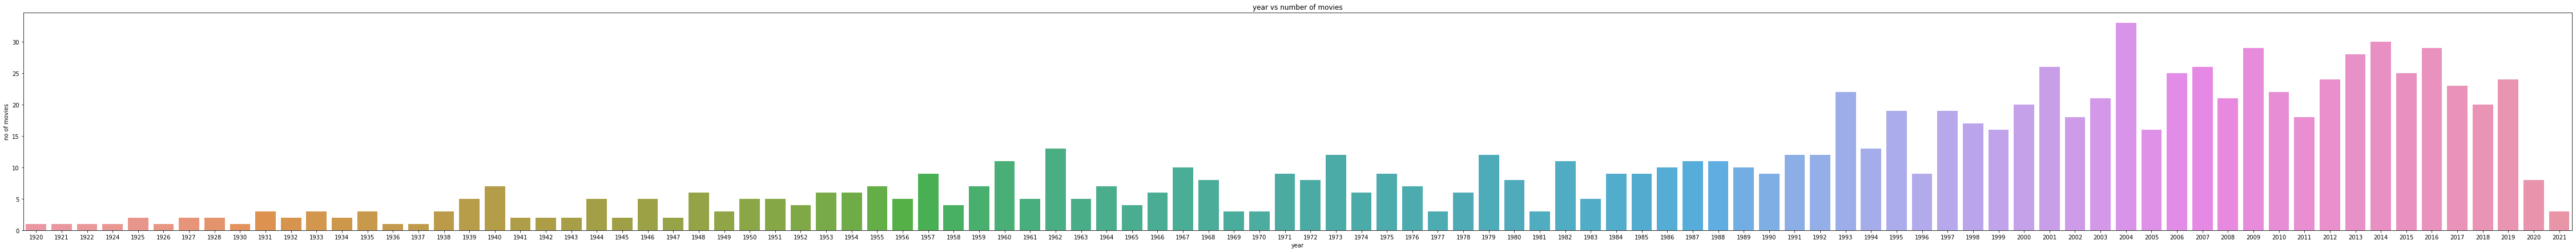

In [19]:
    rcParams['figure.figsize'] = (80,7)
    sns.barplot(x=df_imdb.year.value_counts().index , y=df_imdb.year.value_counts())
    plt.title("year vs number of movies")
    plt.xlabel("year")
    plt.ylabel("no of movies")

## function for graph number of movie vs year

In [20]:
def graph_for_movies_number_in_each_year(i,j):
    x_axis = df_imdb.year.value_counts().sort_index().index[i:j]
    y_axis = df_imdb.year.value_counts().sort_index()[i:j]
    sns.barplot(x=x_axis , y=y_axis);
    plt.title("year vs number of movies")
    plt.xlabel("year")
    plt.ylabel("no of movies")
    sns.set_theme(style="whitegrid")
    

## First 10 Year Graph

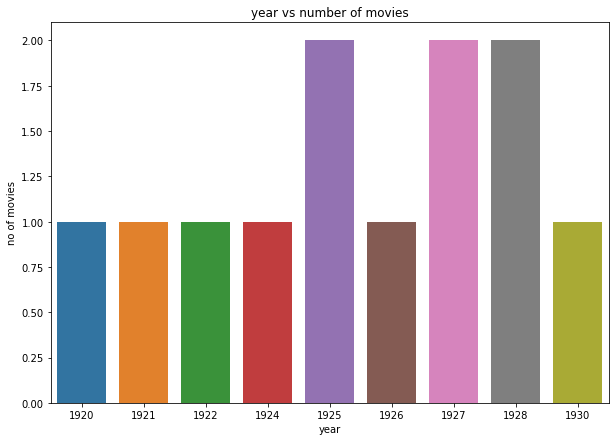

In [21]:
rcParams['figure.figsize'] = (10,7)
graph_for_movies_number_in_each_year(0,9)

## LAST 10 YEARS DATA  

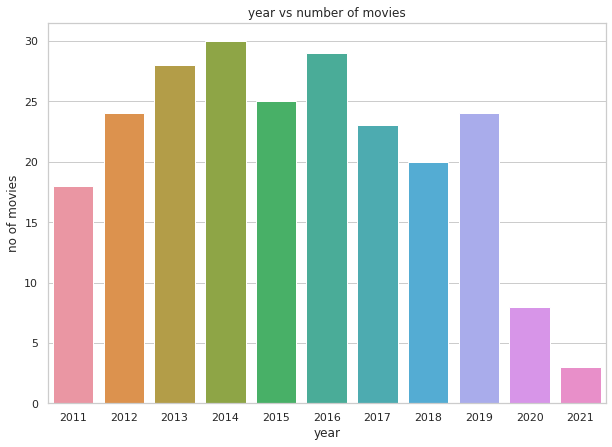

In [22]:
graph_for_movies_number_in_each_year(89,101)

Text(0.5, 1.0, 'LAST TEN YEAR MOVIES WITH %')

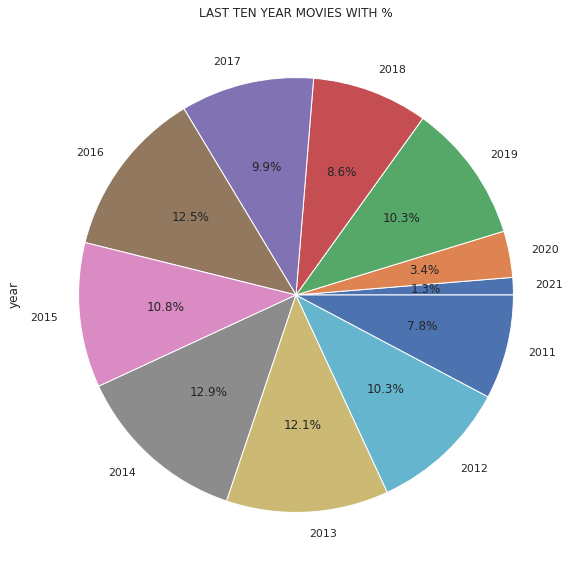

In [23]:
df_imdb.year.value_counts().sort_index(ascending=False)[:11].plot.pie(autopct='%1.1f%%' , figsize=(10,10))
plt.title('LAST TEN YEAR MOVIES WITH %')

# top 10 years with the most number of movie released

In [24]:
df_imdb.year.value_counts().head(10)

2004    33
2014    30
2009    29
2016    29
2013    28
2007    26
2001    26
2015    25
2006    25
2019    24
Name: year, dtype: int64

<AxesSubplot:>

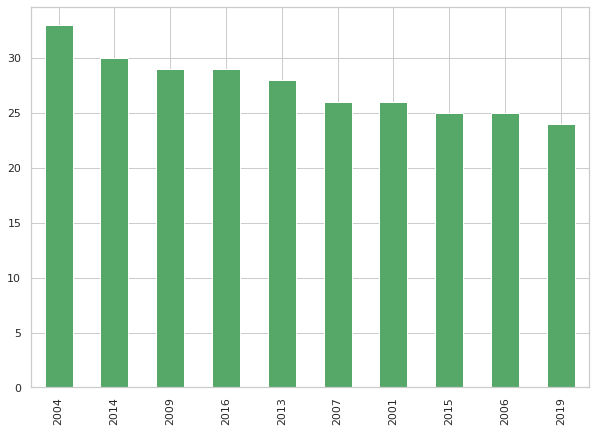

In [25]:
df_imdb.year.value_counts().head(10).plot.bar(color="g")

## MOVIES LIST OF THE YEAR HAVING THE MOST NUMBER OF MOVIES i.e 2004

In [26]:
df_imdb.year.value_counts()[:1]

2004    33
Name: year, dtype: int64

In [28]:
df_imdb[df_imdb['year']==2004]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
99,Eternal Sunshine of the Spotless Mind,2004,108,"Drama, Romance, Sci-Fi",8.3,"When their relationship turns sour, a couple u...",Michel Gondry,https://m.media-amazon.com/images/S/sash/4Fyxw...,938481
162,Swades,2004,189,Drama,8.2,A successful Indian scientist returns to an In...,Ashutosh Gowariker,https://m.media-amazon.com/images/S/sash/4Fyxw...,85959
163,Downfall,2004,156,"Biography, Drama, History",8.2,"Traudl Junge, the final secretary for Adolf Hi...",Oliver Hirschbiegel,https://m.media-amazon.com/images/S/sash/4Fyxw...,338767
164,Howl's Moving Castle,2004,119,"Animation, Adventure, Family",8.2,When an unconfident young woman is cursed with...,Hayao Miyazaki,https://m.media-amazon.com/images/S/sash/4Fyxw...,351077
239,Nobody Knows,2004,141,Drama,8.1,"In a small Tokyo apartment, twelve-year-old Ak...",Hirokazu Koreeda,https://m.media-amazon.com/images/S/sash/4Fyxw...,25932
241,Million Dollar Baby,2004,132,"Drama, Sport",8.1,A determined woman works with a hardened boxin...,Clint Eastwood,https://m.media-amazon.com/images/S/sash/4Fyxw...,651722
242,Hotel Rwanda,2004,121,"Biography, Drama, History",8.1,"Paul Rusesabagina, a hotel manager, houses ove...",Terry George,https://m.media-amazon.com/images/S/sash/4Fyxw...,340985
243,Before Sunset,2004,80,"Drama, Romance",8.1,"Nine years after Jesse and Celine first met, t...",Richard Linklater,https://m.media-amazon.com/images/S/sash/4Fyxw...,244848
377,3-Iron,2004,88,"Crime, Drama, Romance",8.0,A transient young man breaks into empty homes ...,Kim Ki-duk,https://m.media-amazon.com/images/S/sash/4Fyxw...,52374
380,Tae Guk Gi: The Brotherhood of War,2004,140,"Action, Drama, War",8.0,When two brothers are forced to fight in the K...,Je-kyu Kang,https://m.media-amazon.com/images/S/sash/4Fyxw...,38479


## Movies with  maximum and minimum rating in 2004

In [29]:
max_rating = df_imdb[df_imdb['year']==2004].rating.max()
max_rating

8.3

In [30]:
df_imdb[df_imdb['year']==2004][df_imdb.rating == max_rating]

/home/himangshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
99,Eternal Sunshine of the Spotless Mind,2004,108,"Drama, Romance, Sci-Fi",8.3,"When their relationship turns sour, a couple u...",Michel Gondry,https://m.media-amazon.com/images/S/sash/4Fyxw...,938481


In [31]:
min_rating = df_imdb[df_imdb['year']==2004].rating.min()
min_rating

7.6

In [32]:
df_imdb[df_imdb['year']==2004][df_imdb.rating == min_rating]['movie-name'].to_numpy()

/home/himangshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(["Dead Man's Shoes", 'Saw', 'Mysterious Skin',
       'A Very Long Engagement', 'The Butterfly Effect'], dtype=object)

### Movies with maximum votes 

In [33]:
max_votes = df_imdb[df_imdb['year']==2004].votes.max()
max_votes

938481

In [34]:
df_imdb[df_imdb['year']==2004][df_imdb.votes == max_votes]

/home/himangshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
99,Eternal Sunshine of the Spotless Mind,2004,108,"Drama, Romance, Sci-Fi",8.3,"When their relationship turns sour, a couple u...",Michel Gondry,https://m.media-amazon.com/images/S/sash/4Fyxw...,938481


## Genre check

In [35]:
df_imdb[df_imdb['year']==2004].genre.value_counts().sort_values(ascending =False)

Drama, Romance                  3
Drama                           3
Crime, Drama, Thriller          2
Biography, Drama, History       2
Biography, Drama, Family        1
Comedy, Horror                  1
Action, Drama, War              1
Drama, Romance, Sci-Fi          1
Horror, Mystery, Thriller       1
Adventure, Biography, Drama     1
Animation, Action, Adventure    1
Adventure, Family, Fantasy      1
Biography, Drama                1
Drama, Family, Musical          1
Action, Comedy, Fantasy         1
Drama, Sci-Fi, Thriller         1
Drama, Mystery, Romance         1
Action, Mystery, Thriller       1
Comedy, Drama, Music            1
Drama, Thriller                 1
Drama, Sport                    1
Adventure, Comedy, Sci-Fi       1
Action, Crime, Thriller         1
Biography, Drama, Music         1
Animation, Adventure, Family    1
Action, Crime, Drama            1
Crime, Drama, Romance           1
Name: genre, dtype: int64

# Movies in 2004 with graph

In [36]:
year_with_most_movie_list_movie_name = df_imdb[(df_imdb['year']==2004)]['movie-name']
year_with_most_movie_list_duration = df_imdb[(df_imdb['year']==2004)]['duration(min)']
year_with_most_movie_list = {
    "movie_name of 2004" : year_with_most_movie_list_movie_name,
    "duration" : year_with_most_movie_list_duration
}
year_with_most_movie_list_and_duration = pd.DataFrame(year_with_most_movie_list)
year_with_most_movie_list_and_duration

,movie_name of 2004,duration
99,Eternal Sunshine of the Spotless Mind,108
162,Swades,189
163,Downfall,156
164,Howl's Moving Castle,119
239,Nobody Knows,141
241,Million Dollar Baby,132
242,Hotel Rwanda,121
243,Before Sunset,80
377,3-Iron,88
380,Tae Guk Gi: The Brotherhood of War,140


Text(0.5, 0, 'duration in min')

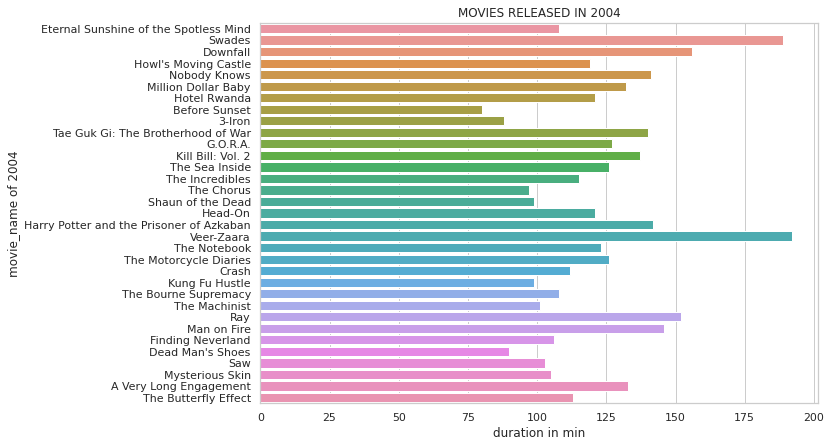

In [37]:
sns.barplot( y="movie_name of 2004" , x="duration" ,data = year_with_most_movie_list_and_duration )
plt.title("MOVIES RELEASED IN 2004")
plt.xlabel("duration in min")

# Information after analysising Year column

- In the first ten years of the dataset i.e from 1920 to 1930 , maximum 2 movies released in each  1925 , 1927 , 1928 

- In the last 10 years maximum movies released is 31 . 
So more movies were released with time with the advancement of technology .

- 3.1 percent of the movies released in 2014.
- 31 movies has been released in 2014. 
- 2004 is the year with the most number of movies released-33 movies , followed by year 2014 with 31 movies and 29 movies in the year 2009.

### Now talking about the movies releasd in 2004  : 
- movie with highest rating  : Eternal Sunshine of the Spotless Mind (8.3 /10)

- movie with maximum votes : Eternal Sunshine of the Spotless Mind (938481)

- Most of the movies released in 2004 have genre DRAMA 

- Five movies got the lowest rating in 2004 , the movies are :
     - Dead Man's Shoes
     - Saw
     - Mysterious Skin
     - A Very Long Engagement 
     - The Butterfly Effect

# DURATION ANALYSIS

In [38]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOGVjYm...,85875
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1167567


## DURATION VS NUMBER OF MOVIES 

In [42]:
duration_vs_no_of_movies = df_imdb['duration(min)'].value_counts().to_frame().rename_axis("duration in min").reset_index().rename(columns={"duration(min)":"no of movies"})

duration_vs_no_of_movies.head()

,duration in min,no of movies
0,130,23
1,129,22
2,100,22
3,101,21
4,113,21


In [43]:
duration_vs_no_of_movies.sort_values("no of movies" , ascending=False).head(10)

,duration in min,no of movies
0,130,23
2,100,22
1,129,22
3,101,21
4,113,21
5,102,20
6,118,19
7,122,19
9,110,18
10,120,18


## Check for average duration of the first 200 movies

In [49]:
average_dur_first_200_movies =  df_imdb.sort_values("year").head(200)['duration(min)'].sum()/df_imdb.sort_values("year").head(200)['duration(min)'].count()
print("Average duration of the first 200 movies : ",average_dur_first_200_movies , "min")

Average duration of the first 200 movies :  115.905 min


## Check for average duration of the last 200 movies

In [50]:
average_dur_last_200_movies =  df_imdb.sort_values("year" , ascending=False).head(200)['duration(min)'].sum()/df_imdb.sort_values("year").head(200)['duration(min)'].count()
print("Average duration of the last 200 movies : ",average_dur_last_200_movies , "min")

Average duration of the last 200 movies :  128.99 min


## top 10 duration with the maximum number of movies

Text(0.5, 1.0, 'top 10 duration with the maximum number of movies')

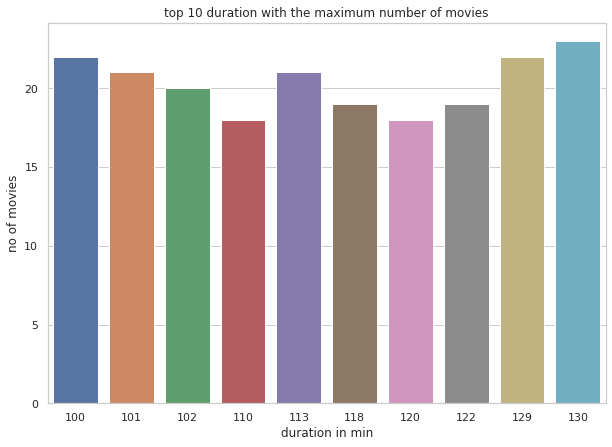

In [51]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='duration in min' , y='no of movies' ,data=duration_vs_no_of_movies.sort_values("no of movies",ascending=False).head(10))
plt.title("top 10 duration with the maximum number of movies")

Text(0.5, 1.0, 'PIE CHART -- Duration(min) vs no of movies ')

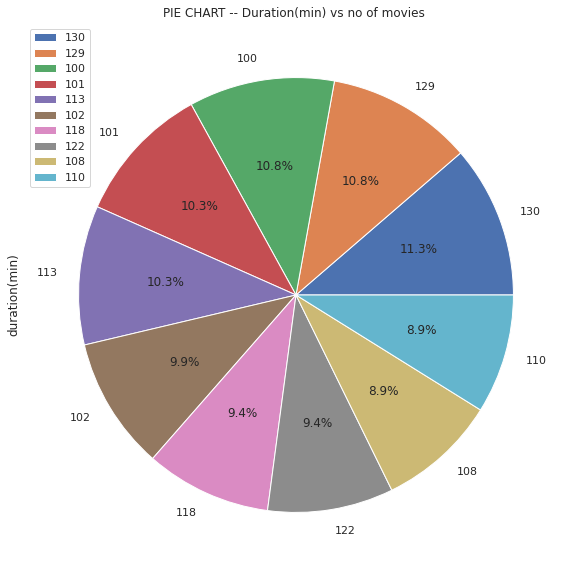

In [52]:

df_imdb["duration(min)"].value_counts().head(10).plot.pie(autopct='%1.1f%%' , figsize=(10,10))
plt.legend()
plt.title("PIE CHART -- Duration(min) vs no of movies ")

## histogram of duration in min

/home/himangshu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/himangshu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency of movies')

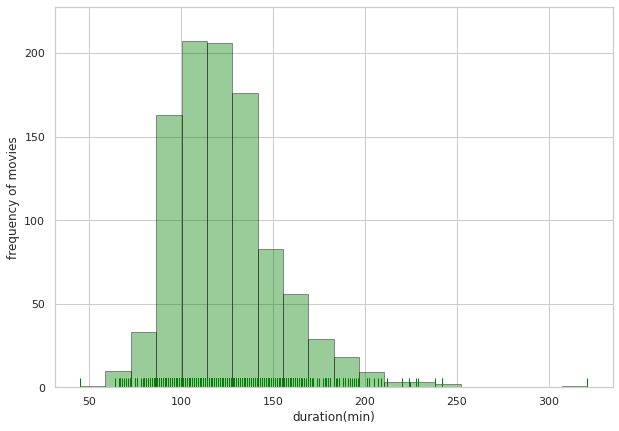

In [53]:
sns.distplot(df_imdb['duration(min)'], hist=True, kde=False, color ='green', bins=20, rug=True,
             hist_kws={'edgecolor':'black'})
plt.ylabel("frequency of movies")

/home/himangshu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/himangshu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


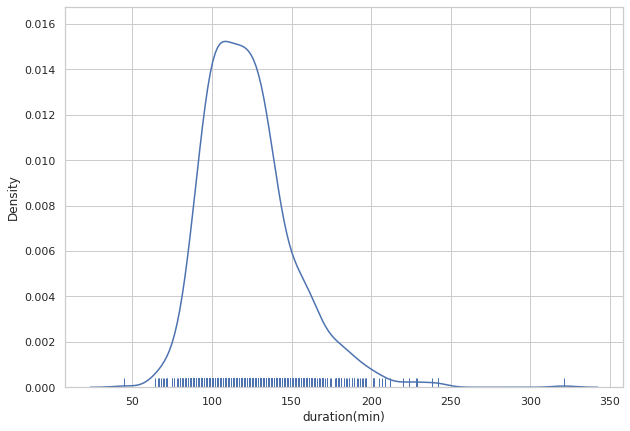

In [54]:
sns.distplot(df_imdb['duration(min)'], hist=False, rug=True);

## TOP TEN MOVIES WITH MAXIMUM DURATION 

In [55]:
top_ten_movie_with_highest_time = df_imdb.sort_values("duration(min)" , ascending=False).head(10)
max_dur_movie = top_ten_movie_with_highest_time['duration(min)'].max()
top_ten_movie_with_highest_time

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
146,Gangs of Wasseypur,2012,321,"Action, Crime, Drama",8.2,A clash between Sultan and Shahid Khan leads t...,Anurag Kashyap,https://m.media-amazon.com/images/S/sash/4Fyxw...,87729
826,Hamlet,1996,242,Drama,7.7,"Hamlet, Prince of Denmark, returns home to fin...",Kenneth Branagh,https://m.media-amazon.com/images/S/sash/4Fyxw...,36744
229,Zack Snyder's Justice League,2021,242,"Action, Adventure, Fantasy",8.1,Determined to ensure Superman's ultimate sacri...,Zack Snyder,https://m.media-amazon.com/images/S/sash/4Fyxw...,318072
327,Gone with the Wind,1939,238,"Drama, History, Romance",8.1,A manipulative woman and a roguish man conduct...,Victor Fleming,https://m.media-amazon.com/images/S/sash/4Fyxw...,298516
76,Once Upon a Time in America,1984,229,"Crime, Drama",8.4,A former Prohibition-era Jewish gangster retur...,Sergio Leone,https://m.media-amazon.com/images/S/sash/4Fyxw...,323390
122,Lawrence of Arabia,1962,228,"Adventure, Biography, Drama",8.3,"The story of T.E. Lawrence, the English office...",David Lean,https://m.media-amazon.com/images/S/sash/4Fyxw...,276370
253,Lagaan: Once Upon a Time in India,2001,224,"Drama, Musical, Sport",8.1,The people of a small village in Victorian Ind...,Ashutosh Gowariker,https://m.media-amazon.com/images/S/sash/4Fyxw...,108042
566,The Ten Commandments,1956,220,"Adventure, Drama",7.9,"Moses, an Egyptian Prince, learns of his true ...",Cecil B. DeMille,https://m.media-amazon.com/images/S/sash/4Fyxw...,66458
309,Ben-Hur,1959,212,"Adventure, Drama, History",8.1,After a Jewish prince is betrayed and sent int...,William Wyler,https://m.media-amazon.com/images/S/sash/4Fyxw...,226191
618,The Irishman,2019,209,"Biography, Crime, Drama",7.8,Hitman Frank Sheeran looks back at the secrets...,Martin Scorsese,https://m.media-amazon.com/images/S/sash/4Fyxw...,345053


#### movie with max duration

In [56]:
top_ten_movie_with_highest_time[:1]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
146,Gangs of Wasseypur,2012,321,"Action, Crime, Drama",8.2,A clash between Sultan and Shahid Khan leads t...,Anurag Kashyap,https://m.media-amazon.com/images/S/sash/4Fyxw...,87729


<AxesSubplot:xlabel='duration(min)', ylabel='movie-name'>

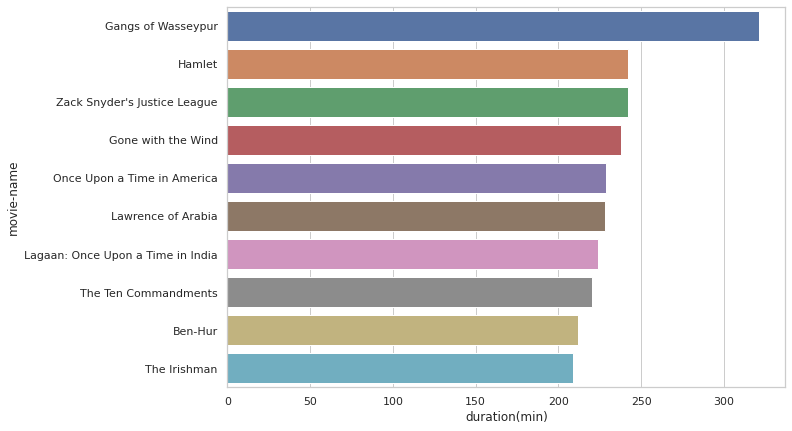

In [57]:
top_ten_movie_with_highest_time = df_imdb.sort_values("duration(min)" , ascending=False).head(10)
sns.barplot(y="movie-name" , x="duration(min)" , data=top_ten_movie_with_highest_time )

## TEN MOVIES WITH LEAST DURATION 

In [58]:
ten_movie_with_LOWEST_time = df_imdb.sort_values("duration(min)" , ascending=True).head(10)
ten_movie_with_LOWEST_time

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
198,Sherlock Jr.,1924,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",Buster Keaton,https://m.media-amazon.com/images/S/sash/4Fyxw...,44584
580,Freaks,1932,64,"Drama, Horror",7.9,A circus' beautiful trapeze artist agrees to m...,Tod Browning,https://m.media-amazon.com/images/S/sash/4Fyxw...,43320
474,Battleship Potemkin,1925,66,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,Sergei M. Eisenstein,https://m.media-amazon.com/images/S/sash/4Fyxw...,54736
335,The Cabinet of Dr. Caligari,1920,67,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",Robert Wiene,https://m.media-amazon.com/images/S/sash/4Fyxw...,59336
334,The General,1926,67,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,Clyde Bruckman,https://m.media-amazon.com/images/S/sash/4Fyxw...,85200
133,The Kid,1921,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",Charles Chaplin,https://m.media-amazon.com/images/S/sash/4Fyxw...,117964
725,Duck Soup,1933,69,"Comedy, Musical, War",7.8,Rufus T. Firefly is named president/dictator o...,Leo McCarey,https://m.media-amazon.com/images/S/sash/4Fyxw...,58102
727,Frankenstein,1931,70,"Drama, Horror, Sci-Fi",7.8,Dr. Frankenstein dares to tamper with life and...,James Whale,https://m.media-amazon.com/images/S/sash/4Fyxw...,67329
891,The Invisible Man,1933,71,"Horror, Sci-Fi",7.7,"A scientist finds a way of becoming invisible,...",James Whale,https://m.media-amazon.com/images/S/sash/4Fyxw...,31912
332,The Circus,1928,72,"Comedy, Romance",8.1,The Tramp finds work and the girl of his dream...,Charles Chaplin,https://m.media-amazon.com/images/S/sash/4Fyxw...,31435


In [59]:
min_duration_movie = ten_movie_with_LOWEST_time[:1]
min_duration_movie

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
198,Sherlock Jr.,1924,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",Buster Keaton,https://m.media-amazon.com/images/S/sash/4Fyxw...,44584


<AxesSubplot:xlabel='duration(min)', ylabel='movie-name'>

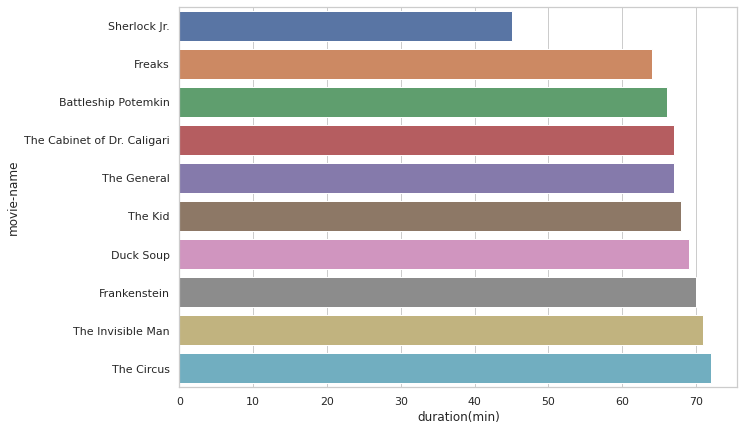

In [60]:
sns.barplot(y="movie-name" , x="duration(min)" , data=ten_movie_with_LOWEST_time )

## INSIGTHS FROM ANALYSING DURATION COLUMN

- Total 24 movies are there having duartion of 130 minutes.

- Most of the movies have duartion ranging from 113 minutes to 130 minutes.

- Average duration in first 50 movies starting from 1920 to 1944  is 116 min.
- Average duration in last 200 movies starting from 2016 to 2021  is 129 min.
 
- Gangs of Wasseypur has the maximum duration of 321 minutes released in 2012
and Sherlock Jr. Is the movie having the minimum duration of 45 minutes.

# ANALYSIS BASED ON GENRES

In [61]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOGVjYm...,85875
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1167567


## number of movies with specific genre

In [62]:
df_genre_count = df_imdb.genre.value_counts().reset_index().rename(columns={"index":"genre" , "genre":"count"})
df_genre_count.head(20)

,genre,count
0,Drama,89
1,"Comedy, Drama",36
2,"Drama, Romance",35
3,"Comedy, Drama, Romance",31
4,"Crime, Drama, Thriller",30
5,"Action, Crime, Drama",29
6,"Crime, Drama, Mystery",29
7,"Biography, Drama, History",28
8,"Crime, Drama",26
9,"Animation, Adventure, Comedy",26


Text(0.5, 1.0, 'GENRE vs NUMBER OF MOVIES')

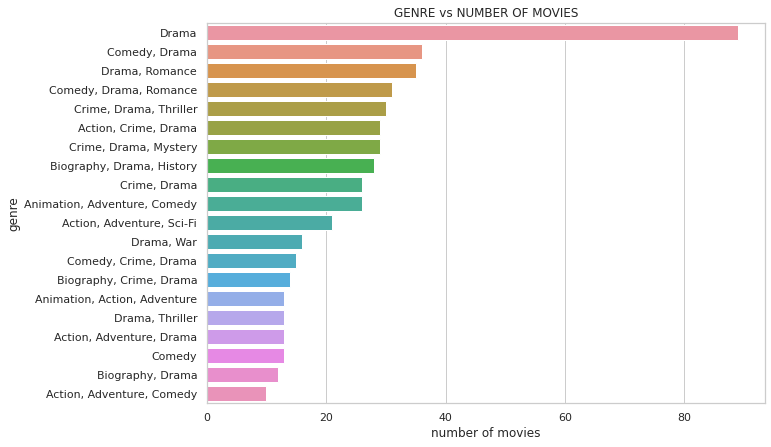

In [63]:
sns.barplot( x="count" , y='genre' , data=df_genre_count.head(20))
plt.xlabel("number of movies")
plt.title("GENRE vs NUMBER OF MOVIES")

## analysis for movies with genre DRAMA only

In [64]:
df_no_of_movies_drama = df_imdb['genre'].str.contains("Drama").fillna(False)
print('Number of movies with Drama','=',len(df_imdb[df_no_of_movies_drama]))

Number of movies with Drama = 723


## number of movies in a year having genre  DRAMA 

In [65]:
df_movies_with_genre_drama = df_imdb[df_no_of_movies_drama].year.value_counts().to_frame().rename_axis("yr").reset_index().rename(columns={"year":"count"})
df_movies_with_genre_drama.head()

,yr,count
0,2013,25
1,2004,24
2,2006,23
3,2016,22
4,2007,22


<AxesSubplot:xlabel='yr', ylabel='count'>

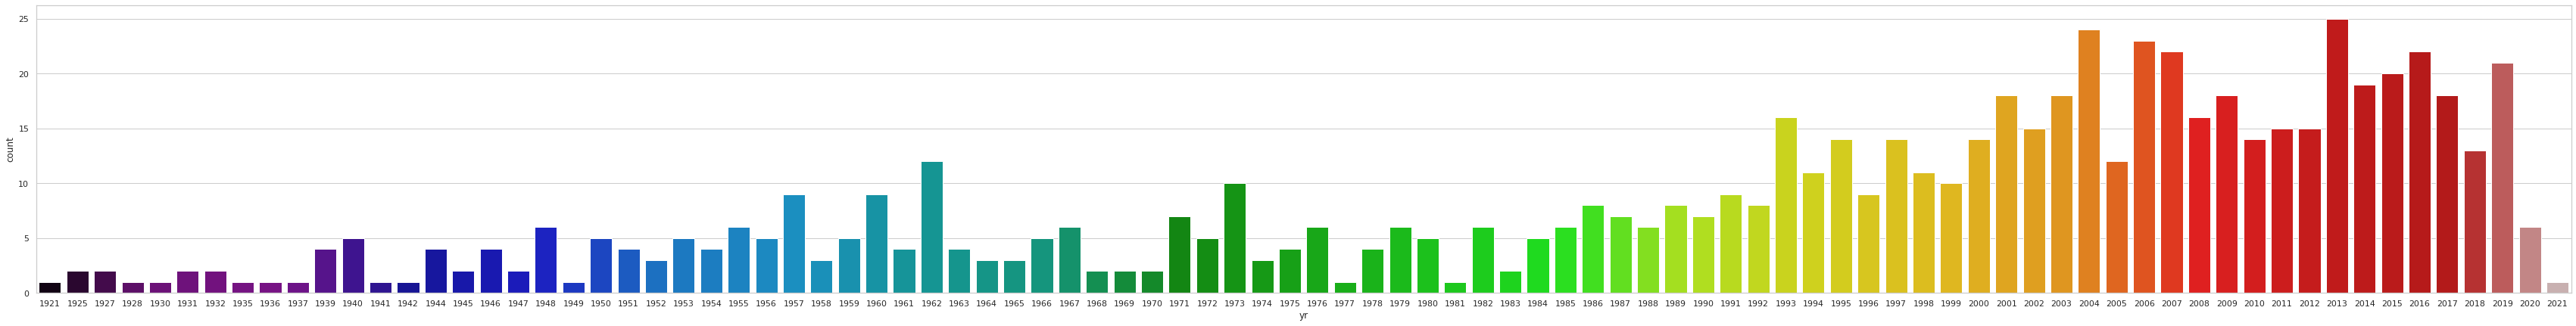

In [66]:
fig, ax = plt.subplots(figsize=(60,7))
sns.barplot(x="yr" , y="count" , data=df_movies_with_genre_drama ,palette="nipy_spectral" )

## Ten years with the most number of movies having genre as drama

Text(0, 0.5, 'number of movies')

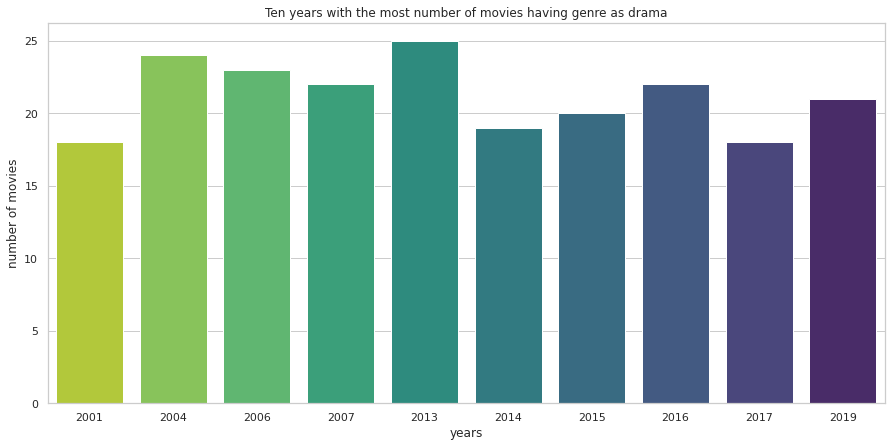

In [67]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="yr" , y="count" , data=df_movies_with_genre_drama.head(10) ,palette="viridis_r" )
plt.title("Ten years with the most number of movies having genre as drama")
plt.xlabel("years")
plt.ylabel("number of movies")

## Insights from genre
- Total number of movies with genre DRAMA is 723 , with most number of movies in 2004.

# RATING ANALYSIS

In [68]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOGVjYm...,85875
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1167567


## movies with rating greater than equal 9.0

In [69]:
movies_greater_than_nine = df_imdb.query('rating >=9')
movies_greater_than_nine

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOGVjYm...,85875
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1167567
5,12 Angry Men,1957,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,https://m.media-amazon.com/images/S/sash/4Fyxw...,717295


In [70]:
print("Number of movies with rating >=9 : " ,movies_greater_than_nine['rating'].count());


Number of movies with rating >=9 :  6


Text(0.5, 1.0, 'movies with rating greater than or eual to 9')

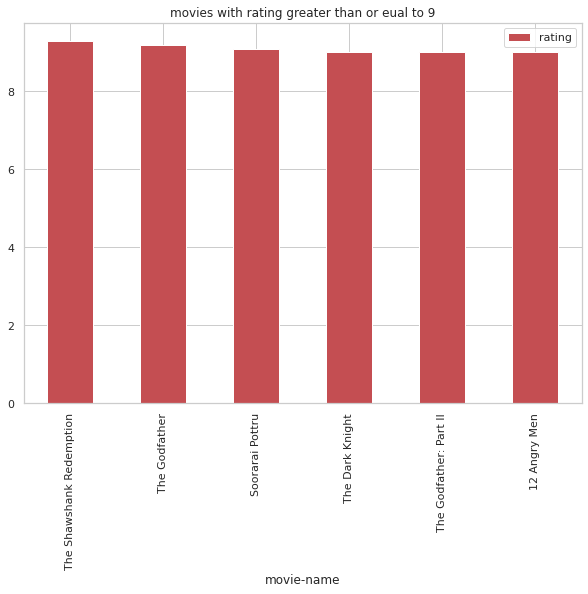

In [71]:
movies_greater_than_nine.plot.bar(x="movie-name" , y="rating" , color="r")
plt.title("movies with rating greater than or eual to 9")


## Movie with maximum rating

In [72]:
df_imdb[df_imdb.rating == df_imdb.rating.max()]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850


<AxesSubplot:xlabel='rating', ylabel='movie-name'>

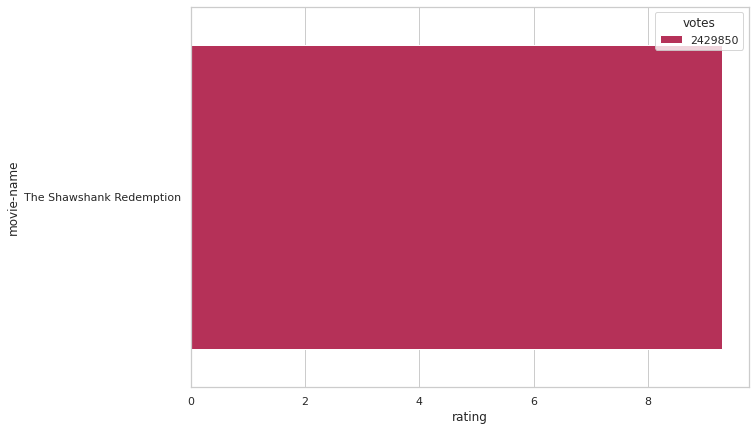

In [73]:
sns.barplot( y="movie-name" , x="rating" ,hue="votes", data=df_imdb[df_imdb.rating == df_imdb.rating.max()] , palette="rocket"  )

## Movie with least rating

In [74]:

df_imdb[df_imdb.rating == df_imdb.rating.min()].head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
892,Dark Waters,2019,126,"Biography, Drama, History",7.6,A corporate defense attorney takes on an envir...,Todd Haynes,https://m.media-amazon.com/images/S/sash/4Fyxw...,70337
893,Searching,2018,102,"Drama, Mystery, Thriller",7.6,"After his teenage daughter goes missing, a des...",Aneesh Chaganty,https://m.media-amazon.com/images/S/sash/4Fyxw...,148715
894,Once Upon a Time... In Hollywood,2019,161,"Comedy, Drama",7.6,A faded television actor and his stunt double ...,Quentin Tarantino,https://m.media-amazon.com/images/S/sash/4Fyxw...,611066
895,Loveless,2017,127,Drama,7.6,A couple going through a divorce must team up ...,Andrey Zvyagintsev,https://m.media-amazon.com/images/S/sash/4Fyxw...,31175
896,Train to Busan,2016,118,"Action, Horror, Thriller",7.6,While a zombie virus breaks out in South Korea...,Sang-ho Yeon,https://m.media-amazon.com/images/S/sash/4Fyxw...,181787


In [75]:

movie_no_with_lowest_rating = df_imdb[df_imdb.rating == df_imdb.rating.min()]['rating'].count()
print("Number of movies with lowest rating of ",df_imdb.rating.min(),": " ,movie_no_with_lowest_rating  )

Number of movies with lowest rating of  7.6 :  108


## histograph of rating 

/home/himangshu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/himangshu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


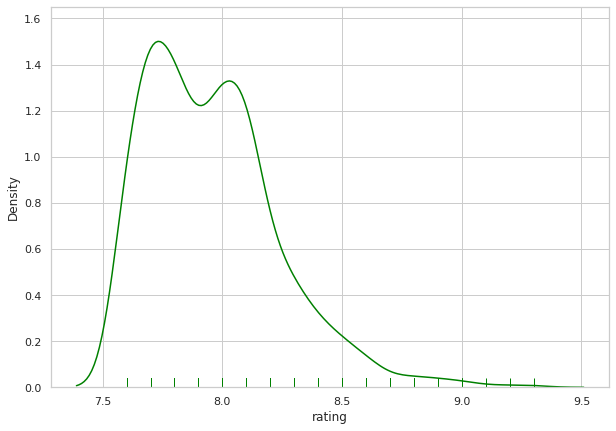

In [76]:
sns.distplot(df_imdb['rating'] ,hist=False, color ='green', bins=20, rug=True);

In [77]:
df_count_rating = df_imdb.rating.value_counts().to_frame().reset_index().rename(columns={"index":"rating" , "rating":"count"})
df_count_rating.head(10)

,rating,count
0,7.7,164
1,7.8,146
2,8.0,139
3,8.1,137
4,7.6,108
5,7.9,107
6,8.2,65
7,8.3,47
8,8.4,31
9,8.5,22


Text(0, 0.5, 'number of movies')

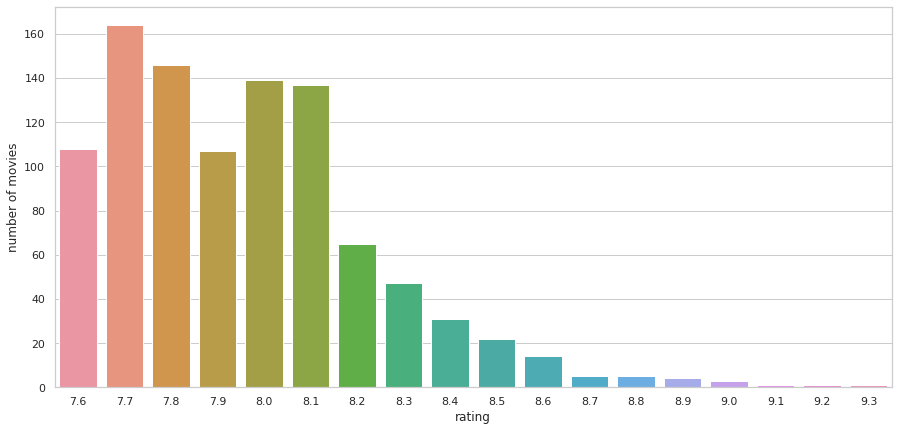

In [78]:
fig ,ax = plt.subplots(figsize=(15,7))
sns.barplot(x="rating" , y="count", data=df_count_rating)
plt.ylabel("number of movies")

## Insights from rating column

<br>

- The movie with maximum rating of 9.3 is The Shawshank Redemption released in 1994
- Number of movies with rating  greater than or equal to 9 is 6.
- Most of the movie were rated in the range of 7.6 to 8.3.
- A total of 164 movie are having 7.7 rating 
- 108 are having the lowest rating of 7.6


# DIRECTOR ANALYSIS 

In [79]:
df_imdb.head()

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074
2,Soorarai Pottru,2020,153,Drama,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,https://m.media-amazon.com/images/M/MV5BOGVjYm...,85875
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,https://m.media-amazon.com/images/S/sash/4Fyxw...,1167567


## top 10 director with the most number of movies

In [80]:
df_top_director = df_imdb.director.value_counts().reset_index().rename(columns={"index":"director" , "director":"count"})
df_top_director.head()

,director,count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10


## Top ten director with the most number of movies

Text(0.5, 1.0, 'TOP TEN DIRECTORS WITH THE MOST NUMBER OF MOVIES')

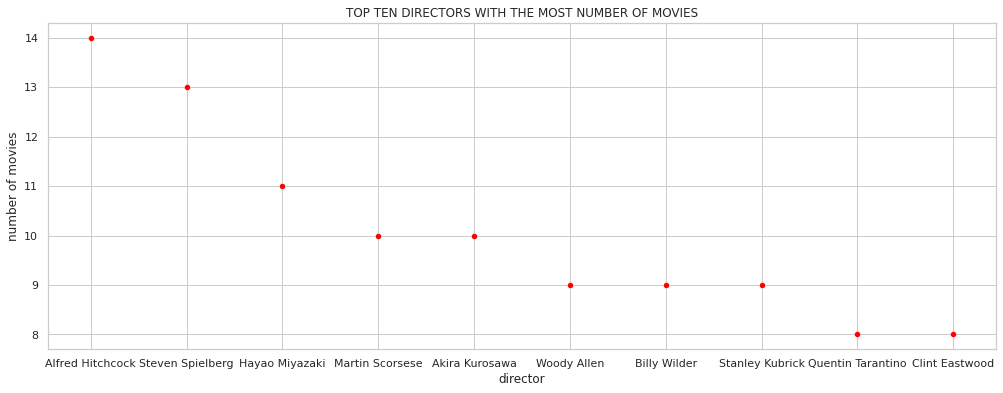

In [81]:
fig ,ax = plt.subplots(figsize=(17,6))
sns.scatterplot(y="count" , x="director"  , data=df_top_director.head(10) , color="red")
plt.ylabel("number of movies")
plt.title("TOP TEN DIRECTORS WITH THE MOST NUMBER OF MOVIES")

## Moives by Director having the highest number of movies

In [82]:
df_top_director.head(1)

,director,count
0,Alfred Hitchcock,14


In [83]:
df_AH = df_imdb[df_imdb.director=="Alfred Hitchcock"]
df_copied_df_AH = df_AH.copy()
df_cleaned_AH = df_copied_df_AH.drop(['overview' ,'director' , 'image_url' ] , axis=1)

In [85]:
pip install tabulate

  Using cached https://files.pythonhosted.org/packages/ca/80/7c0cad11bd99985cfe7c09427ee0b4f9bd6b048bd13d4ffb32c6db237dfb/tabulate-0.8.9-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [93]:
from tabulate import tabulate
print( "\n\n\t\t\t\tMOVIES DIRECTED BY Alfred Hitchcock")
print(tabulate(df_cleaned_AH, headers = 'keys', tablefmt = 'fancy_grid' , showindex="never"))



				MOVIES DIRECTED BY Alfred Hitchcock
╒══════════════════════╤════════╤═════════════════╤══════════════════════════════╤══════════╤═════════╕
│ movie-name           │   year │   duration(min) │ genre                        │   rating │   votes │
╞══════════════════════╪════════╪═════════════════╪══════════════════════════════╪══════════╪═════════╡
│ Psycho               │   1960 │             109 │ Horror, Mystery, Thriller    │      8.5 │  622803 │
├──────────────────────┼────────┼─────────────────┼──────────────────────────────┼──────────┼─────────┤
│ Rear Window          │   1954 │             112 │ Mystery, Thriller            │      8.5 │  459083 │
├──────────────────────┼────────┼─────────────────┼──────────────────────────────┼──────────┼─────────┤
│ North by Northwest   │   1959 │             136 │ Adventure, Mystery, Thriller │      8.3 │  308528 │
├──────────────────────┼────────┼─────────────────┼──────────────────────────────┼──────────┼─────────┤
│ Vertigo             

This is jointplot graph that shows the relation between rating and number of votes


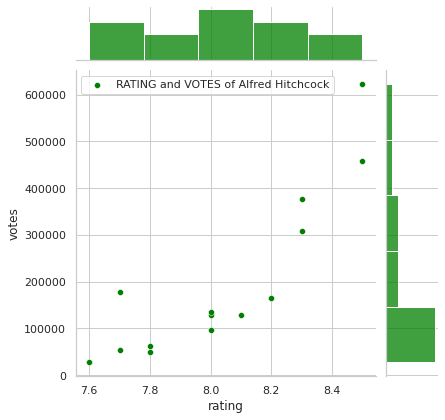

In [96]:
sns.jointplot(x="rating" , y="votes" , data=df_cleaned_AH , color="green" , label="RATING and VOTES of Alfred Hitchcock")
print("This is jointplot graph that shows the relation between rating and number of votes")

## Moives by Christopher Nolan

In [89]:
no_of_movie_by_CN = df_imdb.director.value_counts()["Christopher Nolan"]
print(f"Number of movies Directed by Christopher Nolan :  {no_of_movie_by_CN}"  )

Number of movies Directed by Christopher Nolan :  8


In [90]:
df_CN = df_imdb[df_imdb.director=="Christopher Nolan"]
df_copied_df_CN = df_CN.copy()

In [91]:
df_cleaned = df_copied_df_CN.drop(['overview' ,'director' , 'image_url' ] , axis=1)

In [94]:

print( "\n\n\t\t\t\tMOVIES DIRECTED BY CHRISTOPHER NOLAN")
print(tabulate(df_cleaned, headers = 'keys', tablefmt = 'fancy_grid' , showindex="never"))



				MOVIES DIRECTED BY CHRISTOPHER NOLAN
╒═══════════════════════╤════════╤═════════════════╤═══════════════════════════╤══════════╤═════════╕
│ movie-name            │   year │   duration(min) │ genre                     │   rating │   votes │
╞═══════════════════════╪════════╪═════════════════╪═══════════════════════════╪══════════╪═════════╡
│ The Dark Knight       │   2008 │             152 │ Action, Crime, Drama      │      9   │ 2385740 │
├───────────────────────┼────────┼─────────────────┼───────────────────────────┼──────────┼─────────┤
│ Inception             │   2010 │             148 │ Action, Adventure, Sci-Fi │      8.8 │ 2141317 │
├───────────────────────┼────────┼─────────────────┼───────────────────────────┼──────────┼─────────┤
│ Interstellar          │   2014 │             169 │ Adventure, Drama, Sci-Fi  │      8.6 │ 1586642 │
├───────────────────────┼────────┼─────────────────┼───────────────────────────┼──────────┼─────────┤
│ The Prestige          │   2006 │     

## Insights from Director column

<br>

- **Alfred Hitchcock** is the director with most number of movies among all directors.
Total 14 movies were directed by him.

<br>

- Movies by **Christopher Nolan** : 
    - Total number of movies directed : 8
    - Movies with higest rating (9) : The Dark Knight ( 2008 )
    - Movies with highest duration(169 min ) :  Interstellar (2014)

# VOTES ANALYSIS

## TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES


In [104]:
df_top_ten_most_voted_movie = df_imdb.sort_values('votes' , ascending=False).head(10)
df_top_ten_most_voted_movie

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
10,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,https://m.media-amazon.com/images/S/sash/4Fyxw...,2141317
11,Fight Club,1999,139,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,https://m.media-amazon.com/images/S/sash/4Fyxw...,1916428
8,Pulp Fiction,1994,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,https://m.media-amazon.com/images/S/sash/4Fyxw...,1885285
13,Forrest Gump,1994,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the V...",Robert Zemeckis,https://m.media-amazon.com/images/S/sash/4Fyxw...,1878044
16,The Matrix,1999,136,"Action, Sci-Fi",8.7,When a beautiful stranger leads computer hacke...,Lana Wachowski,https://m.media-amazon.com/images/S/sash/4Fyxw...,1730705
12,The Lord of the Rings: The Fellowship of the Ring,2001,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,Peter Jackson,https://m.media-amazon.com/images/S/sash/4Fyxw...,1711745
7,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,https://m.media-amazon.com/images/S/sash/4Fyxw...,1690502
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074


In [95]:
df_votes = df_imdb.sort_values('votes' , ascending=False).copy()
df_copied_for_votes = df_votes.drop(["overview" , "image_url" , 'genre'] , axis=1)
print( "\n\n\t\t\t\t\tTOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES")
print(tabulate(df_copied_for_votes[:10], headers = 'keys', tablefmt = 'fancy_grid' , showindex="never"))



					TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES
╒═══════════════════════════════════════════════════╤════════╤═════════════════╤══════════╤══════════════════════╤═════════╕
│ movie-name                                        │   year │   duration(min) │   rating │ director             │   votes │
╞═══════════════════════════════════════════════════╪════════╪═════════════════╪══════════╪══════════════════════╪═════════╡
│ The Shawshank Redemption                          │   1994 │             142 │      9.3 │ Frank Darabont       │ 2429850 │
├───────────────────────────────────────────────────┼────────┼─────────────────┼──────────┼──────────────────────┼─────────┤
│ The Dark Knight                                   │   2008 │             152 │      9   │ Christopher Nolan    │ 2385740 │
├───────────────────────────────────────────────────┼────────┼─────────────────┼──────────┼──────────────────────┼─────────┤
│ Inception                                         │   2010 │        

## movie with highest votes

In [98]:
df_imdb[df_imdb.votes == df_imdb.votes.max()]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850


## Movies with the lowest votes

In [100]:
df_imdb[df_imdb.votes == df_imdb.votes.min()]

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
478,Hindi Medium,2017,132,"Comedy, Drama",7.9,A couple from Chandni Chowk aspire to give the...,Saket Chaudhary,https://m.media-amazon.com/images/S/sash/4Fyxw...,25174


Text(0.5, 1.0, 'TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES')

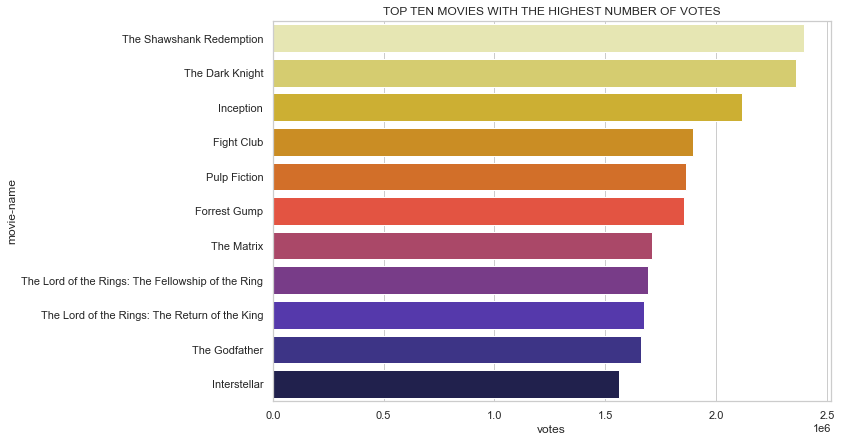

In [604]:
ax = plt.subplots(figsize=(10,7))
sns.barplot(y="movie-name", x="votes", data=df_copied_for_votes[:11] , palette="CMRmap_r");
plt.title("TOP TEN MOVIES WITH THE HIGHEST NUMBER OF VOTES")

In [106]:
df_top_ten_most_voted_movie

,movie-name,year,duration(min),genre,rating,overview,director,image_url,votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,https://m.media-amazon.com/images/M/MV5BMDFkYT...,2429850
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,https://m.media-amazon.com/images/M/MV5BMTMxNT...,2385740
10,Inception,2010,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,https://m.media-amazon.com/images/S/sash/4Fyxw...,2141317
11,Fight Club,1999,139,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,https://m.media-amazon.com/images/S/sash/4Fyxw...,1916428
8,Pulp Fiction,1994,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,https://m.media-amazon.com/images/S/sash/4Fyxw...,1885285
13,Forrest Gump,1994,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the V...",Robert Zemeckis,https://m.media-amazon.com/images/S/sash/4Fyxw...,1878044
16,The Matrix,1999,136,"Action, Sci-Fi",8.7,When a beautiful stranger leads computer hacke...,Lana Wachowski,https://m.media-amazon.com/images/S/sash/4Fyxw...,1730705
12,The Lord of the Rings: The Fellowship of the Ring,2001,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,Peter Jackson,https://m.media-amazon.com/images/S/sash/4Fyxw...,1711745
7,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,https://m.media-amazon.com/images/S/sash/4Fyxw...,1690502
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,https://m.media-amazon.com/images/M/MV5BM2MyNj...,1682074


## top ten movies with highest rating and votes

This jointplot graph shows the relation between rating and number of votes of the top ten movies with the highest number of votes.


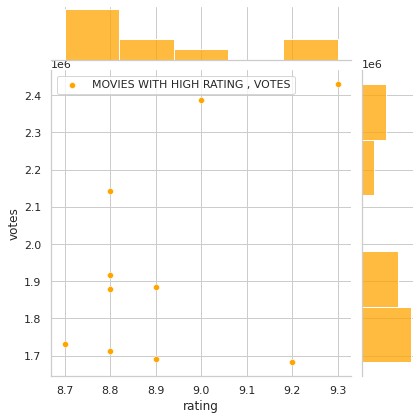

In [108]:
sns.jointplot(x="rating", y="votes", data=df_top_ten_most_voted_movie, color="orange" , label="MOVIES WITH HIGH RATING , VOTES")
print("This jointplot graph shows the relation between rating and number of votes of the top ten movies with the highest number of votes.")

## Insights from the votes column

<br>

- Movie with highest votes  ( 2429850 votes) :  The Shawshank Redemption.

- Movie with lowest number of votes : ( 25274 votes ) : Hindi Medium.

- From the jointplot graph above it is clear that the movies with highest rating is not having the highest votes .

- The reason behind may be because the most voted movies are released in the most recent so with the involvement of science and technolgy people are more interact with the cinema world and another may be the population which increases with time.

- Taking a example the movie " **The God Father** " released in 1972 is having  a rating of 9.
        2  has less number of votes than the movie " **inception** " ( 2010 ) which has a rating of 8.8.